In [1]:
# 6.3.1 Plotting Things

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json

In [3]:
city_data_df = pd.read_csv("Resources/cities.csv")

In [4]:
city_data_df.head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Punta Arenas,CL,2022-06-28 17:59:41,-53.1500,-70.9167,41.11,75,75,12.66
1,1,Matinhos,BR,2022-06-28 17:59:41,-25.8175,-48.5428,75.90,70,30,6.44
2,2,Bluff,NZ,2022-06-28 17:59:42,-46.6000,168.3333,40.80,77,100,19.30
3,3,Oranjemund,NaN,2022-06-28 17:59:42,-28.5500,16.4333,72.45,32,0,10.98
4,4,Nanortalik,GL,2022-06-28 17:59:42,60.1432,-45.2371,47.07,66,100,14.50


In [5]:
city_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578 entries, 0 to 577
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City_ID     578 non-null    int64  
 1   City        578 non-null    object 
 2   Country     572 non-null    object 
 3   Date        578 non-null    object 
 4   Lat         578 non-null    float64
 5   Lng         578 non-null    float64
 6   Max Temp    578 non-null    float64
 7   Humidity    578 non-null    int64  
 8   Cloudiness  578 non-null    int64  
 9   Wind Speed  578 non-null    float64
dtypes: float64(4), int64(3), object(3)
memory usage: 45.3+ KB


In [6]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [7]:
import time
# get today's date in seconds
today = time.strftime("%x")
today

'06/30/22'

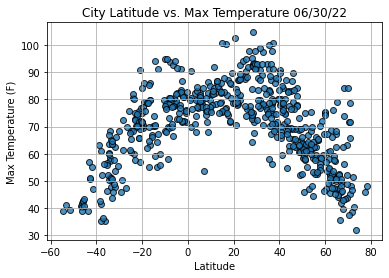

In [8]:
# build the scatterplot for lat v max temp
plt.scatter(lats, max_temps, linewidths=1, 
            edgecolor="black", marker="o",
            alpha=0.8, label="Cities")

#incorporate other graph properties
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# save 
plt.savefig("Fig1.png")
plt.show()

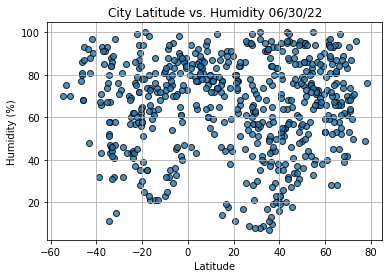

In [9]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig2.png")
# Show plot.
plt.show()

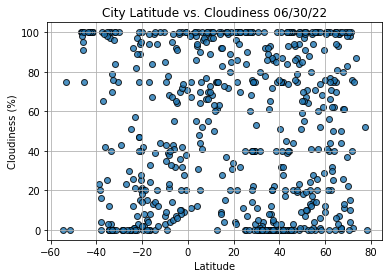

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig3.png")
# Show plot.
plt.show()

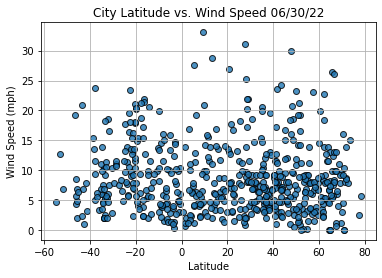

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig4.png")
# Show plot.
plt.show()

In [32]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates, r_coord):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    r_value = "r= " + str(round(r_value, 4))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.annotate(r_value, r_coord, fontsize=10, color="green")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [13]:
# use .loc to get data at a particular index
index13 = city_data_df.loc[13]
index13

City_ID                        13
City                   Monteagudo
Country                        BO
Date          2022-06-28 17:59:45
Lat                      -19.8167
Lng                      -63.9833
Max Temp                    69.49
Humidity                       51
Cloudiness                     42
Wind Speed                    7.9
Name: 13, dtype: object

In [14]:
# use loc to filter the df by criteria

northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [15]:
northern_hemi_df.head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
4,4,Nanortalik,GL,2022-06-28 17:59:42,60.1432,-45.2371,47.07,66,100,14.50
5,5,Teguise,ES,2022-06-28 17:59:42,29.0605,-13.5640,71.82,57,40,21.85
8,8,Jamestown,US,2022-06-28 17:59:24,42.0970,-79.2353,70.95,51,0,3.00
9,9,Cabo San Lucas,MX,2022-06-28 17:59:43,22.8909,-109.9124,92.61,66,100,5.86
11,11,Albany,US,2022-06-28 17:59:44,42.6001,-73.9662,74.88,55,17,7.36


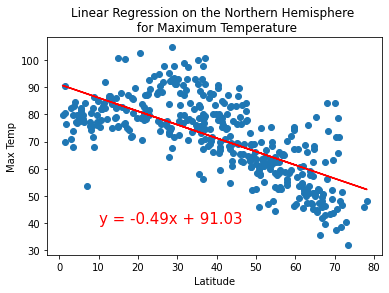

In [16]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere \n for Maximum Temperature" , "Max Temp",(10,40))

In [17]:
linregress(x_values, y_values)

LinregressResult(slope=-0.49396191500237224, intercept=91.02622665519532, rvalue=-0.6822700283789425, pvalue=7.219307200863245e-55, stderr=0.02683733066933218, intercept_stderr=1.1813966351462615)

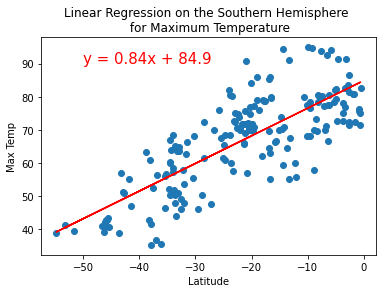

In [18]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere \n for Maximum Temperature", 'Max Temp',(-50,90))

In [19]:
linregress(x_values, y_values)

LinregressResult(slope=0.8361827349781901, intercept=84.89747629912316, rvalue=0.7851106402917246, pvalue=2.4005319922220988e-40, stderr=0.048498074248035344, intercept_stderr=1.2207447137859986)

In [20]:
# print(rvalue)
# THIS DOESNT WORK, WHY?

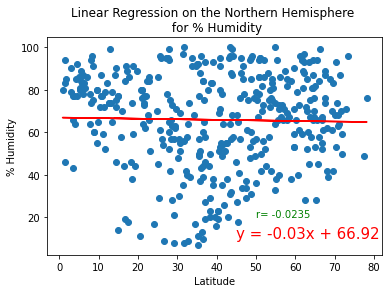

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere \n for % Humidity" , "% Humidity",(45,10), (50, 20))

In [25]:
linregress(x_values, y_values)

LinregressResult(slope=-0.026597048958938833, intercept=66.92376985434566, rvalue=-0.023541424541459615, pvalue=0.6425936636198855, stderr=0.057267145567044264, intercept_stderr=2.5209367470606487)

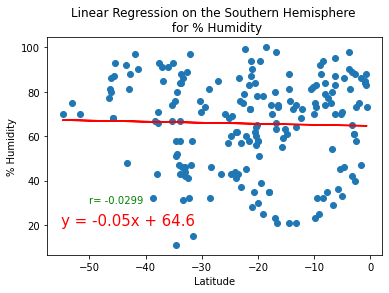

In [39]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere \n for % Humidity" , "% Humidity",(-55,20), (-50, 30))

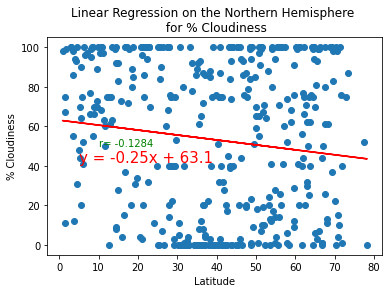

In [41]:
# linear regression on NH for Cloudiness

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere \n for % Cloudiness", "% Cloudiness", (5,42), (10,50))

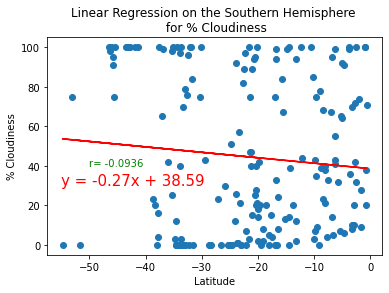

In [47]:
# linear regression on SH for Cloudiness

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere \n for % Cloudiness", "% Cloudiness", (-55,30), (-50, 40))

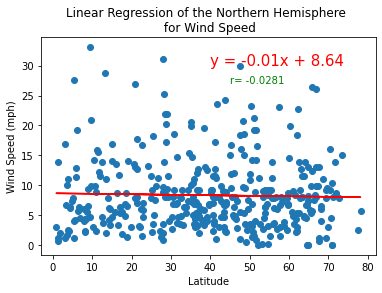

In [51]:
# linear regression NH and Wind

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

plot_linear_regression(x_values, y_values, "Linear Regression of the Northern Hemisphere \n for Wind Speed", "Wind Speed (mph)", (40,30), (45,27))

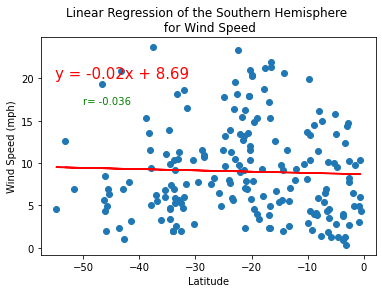

In [58]:
# linear regression SH and Wind

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

plot_linear_regression(x_values, y_values, "Linear Regression of the Southern Hemisphere \n for Wind Speed", "Wind Speed (mph)", (-55,20), (-50,17))